In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
pd.set_option('display.max_columns', None)
file_path = "jabodetabek_house_price.csv"
house_df = pd.read_csv(file_path)

In [26]:
house_df.head()

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,ads_id,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,certificate,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,hos11360272,4.0,4.0,239.0,272.0,0.0,shm - sertifikat hak milik,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,hos10680347,3.0,2.0,55.0,69.0,1.0,hgb - hak guna bangunan,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,hos10685867,3.0,3.0,119.0,131.0,1.0,hgb - hak guna bangunan,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,hos10927790,3.0,3.0,180.0,174.0,0.0,shm - sertifikat hak milik,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,hos10785530,4.0,3.0,328.0,196.0,2.0,shm - sertifikat hak milik,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished


<h2>Data Preparation</h2>

In [27]:
df = house_df.drop(['url','ads_id','title','facilities','address','district','furnishing','property_type','building_age'], axis=1)
df.head()

,price_in_rp,city,lat,long,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,certificate,electricity,maid_bedrooms,maid_bathrooms,floors,year_built,property_condition,building_orientation,garages
0,2.990000e+09,Bekasi,-6.223945,106.986275,4.0,4.0,239.0,272.0,0.0,shm - sertifikat hak milik,4400 mah,0.0,1.0,2.0,2017.0,bagus,NaN,0.0
1,1.270000e+09,Bekasi,-6.223945,106.986275,3.0,2.0,55.0,69.0,1.0,hgb - hak guna bangunan,2200 mah,0.0,0.0,2.0,NaN,bagus,NaN,0.0
2,1.950000e+09,Bekasi,-6.223945,106.986275,3.0,3.0,119.0,131.0,1.0,hgb - hak guna bangunan,2200 mah,1.0,1.0,2.0,NaN,bagus,NaN,1.0
3,3.300000e+09,Bekasi,-6.223945,106.986275,3.0,3.0,180.0,174.0,0.0,shm - sertifikat hak milik,3500 mah,1.0,1.0,2.0,2016.0,bagus sekali,utara,2.0
4,4.500000e+09,Bekasi,-6.223945,106.986275,4.0,3.0,328.0,196.0,2.0,shm - sertifikat hak milik,3500 mah,1.0,1.0,2.0,2013.0,bagus,utara,1.0


In [28]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(missing_data[column].value_counts())
    print('')

price_in_rp
False    3553
Name: count, dtype: int64

city
False    3553
Name: count, dtype: int64

lat
False    3553
Name: count, dtype: int64

long
False    3553
Name: count, dtype: int64

bedrooms
False    3519
True       34
Name: count, dtype: int64

bathrooms
False    3524
True       29
Name: count, dtype: int64

land_size_m2
False    3551
True        2
Name: count, dtype: int64

building_size_m2
False    3551
True        2
Name: count, dtype: int64

carports
False    3553
Name: count, dtype: int64

certificate
False    3412
True      141
Name: count, dtype: int64

electricity
False    3553
Name: count, dtype: int64

maid_bedrooms
False    3553
Name: count, dtype: int64

maid_bathrooms
False    3553
Name: count, dtype: int64

floors
False    3547
True        6
Name: count, dtype: int64

year_built
False    2108
True     1445
Name: count, dtype: int64

property_condition
False    3307
True      246
Name: count, dtype: int64

building_orientation
False    1906
True     1647
Name: cou

In [29]:
df['electricity'] = df['electricity'].str.replace('mah', '').str.strip()
df['electricity'] = pd.to_numeric(df['electricity'], errors='coerce')

In [30]:
df = df[df['bedrooms'] < 8]
df = df[df['bathrooms'] < 5]
df = df[df['maid_bedrooms'] < 3]
df = df[df['maid_bathrooms'] < 2]
df = df[df['carports'] < 3]
df = df[df['floors'] < 4]
df = df[df['garages'] < 3]
df = df[df['year_built'] > 2]

value_counts = df['electricity'].value_counts()
df = df[df['electricity'].isin(value_counts[value_counts > 5].index)]


In [31]:
median_bedrooms = df['bedrooms'].median()
df['bedrooms'] = df['bedrooms'].fillna(median_bedrooms).astype(int)

median_bathrooms = df['bathrooms'].median()
df['bathrooms'] = df['bathrooms'].fillna(median_bedrooms).astype(int)

common_land_size_m2 = df['land_size_m2'].value_counts().idxmax()
df['land_size_m2'] = df['land_size_m2'].fillna(common_land_size_m2)

common_building_size_m2 = df['building_size_m2'].value_counts().idxmax()
df['building_size_m2'] = df['building_size_m2'].fillna(common_building_size_m2)

common_certificate = df['certificate'].value_counts().idxmax()
df['certificate'] = df['certificate'].fillna(common_certificate)

median_floors = df['floors'].median().round()
df['floors'] = df['floors'].fillna(median_floors).astype(int)

median_year = df['year_built'].median()
df['year_built'] = df['year_built'].fillna(median_year).astype(int)

common_condition = df['property_condition'].value_counts().idxmax()
df['property_condition'] = df['property_condition'].fillna(common_condition)

common_orientation = df['building_orientation'].value_counts().idxmax()
df['building_orientation'] = df['building_orientation'].fillna(common_orientation)

In [32]:
X = df.drop(['price_in_rp'],axis=1)
y = df['price_in_rp']

In [33]:
X_train,X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2)

In [34]:
train_data = X_train.join(y_train)

In [35]:
train_data.head()

,city,lat,long,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,certificate,electricity,maid_bedrooms,maid_bathrooms,floors,year_built,property_condition,building_orientation,garages,price_in_rp
2477,Jakarta Timur,-6.190791,106.891628,2,2,33.0,60.0,1.0,shm - sertifikat hak milik,2200.0,0.0,0.0,2,2022,baru,utara,1.0,7.800000e+08
2493,Jakarta Barat,-6.146166,106.819375,2,2,22.0,42.0,0.0,shm - sertifikat hak milik,2200.0,0.0,0.0,2,2022,baru,timur,0.0,5.280000e+08
3310,Tangerang,-6.314230,106.710505,2,2,71.0,62.0,1.0,shm - sertifikat hak milik,2200.0,0.0,0.0,2,2020,baru,barat daya,0.0,1.230000e+09
2405,Jakarta Barat,-6.181842,106.721780,3,2,120.0,160.0,0.0,shm - sertifikat hak milik,2200.0,1.0,1.0,2,2015,sudah renovasi,selatan,2.0,3.500000e+09
189,Bekasi,-6.292665,107.027410,3,2,125.0,65.0,1.0,shm - sertifikat hak milik,2200.0,0.0,0.0,2,2022,baru,timur,0.0,1.010000e+09


In [36]:
train_data['building_age'] = 2025 - train_data['year_built']

In [37]:
train_data.drop(['year_built'],axis=1,inplace=True)

array([[<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'land_size_m2'}>,
        <Axes: title={'center': 'building_size_m2'}>,
        <Axes: title={'center': 'carports'}>,
        <Axes: title={'center': 'electricity'}>],
       [<Axes: title={'center': 'maid_bedrooms'}>,
        <Axes: title={'center': 'maid_bathrooms'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'garages'}>],
       [<Axes: title={'center': 'price_in_rp'}>,
        <Axes: title={'center': 'building_age'}>, <Axes: >, <Axes: >]],
      dtype=object)

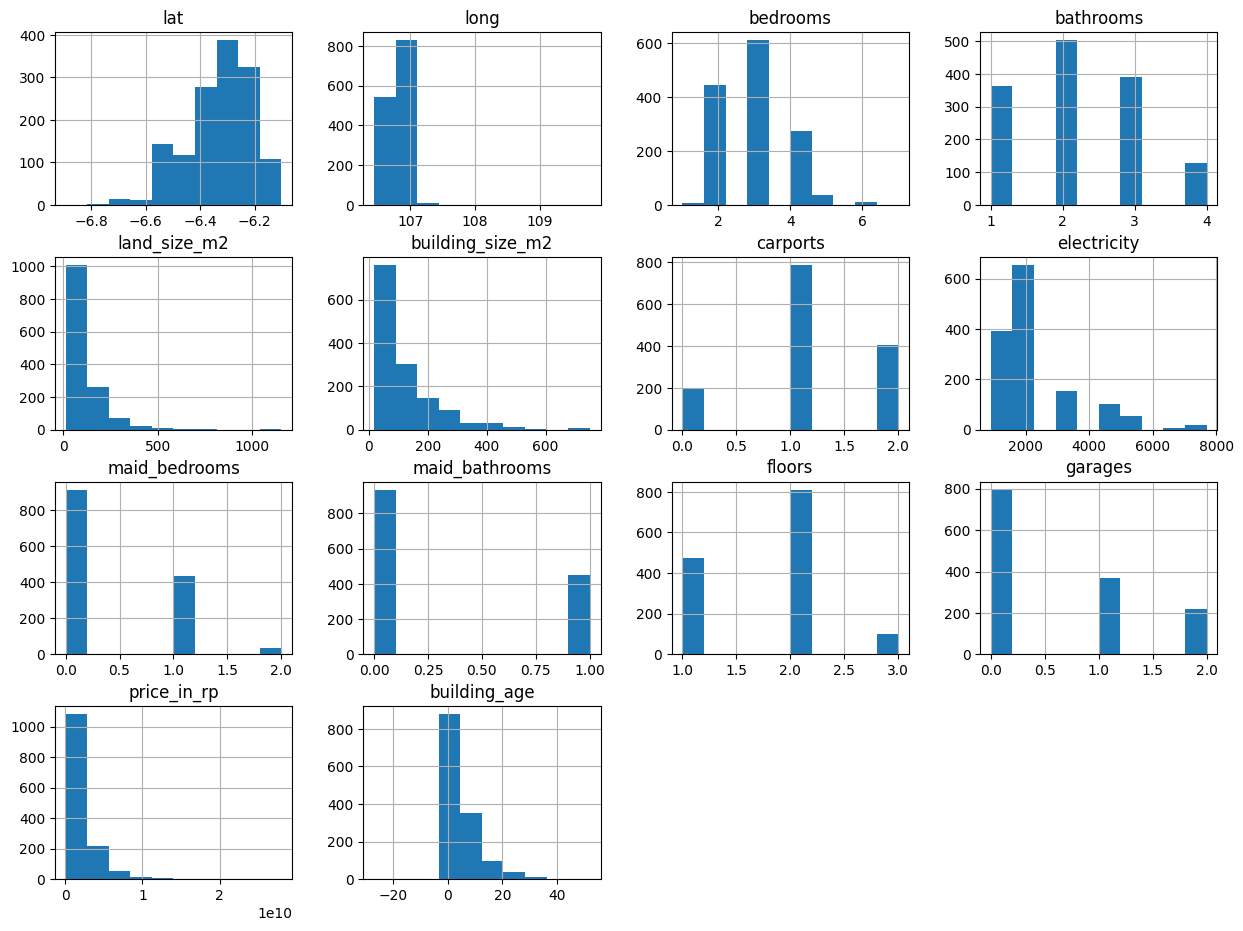

In [38]:
train_data.hist(figsize=(15,11))

<Axes: >

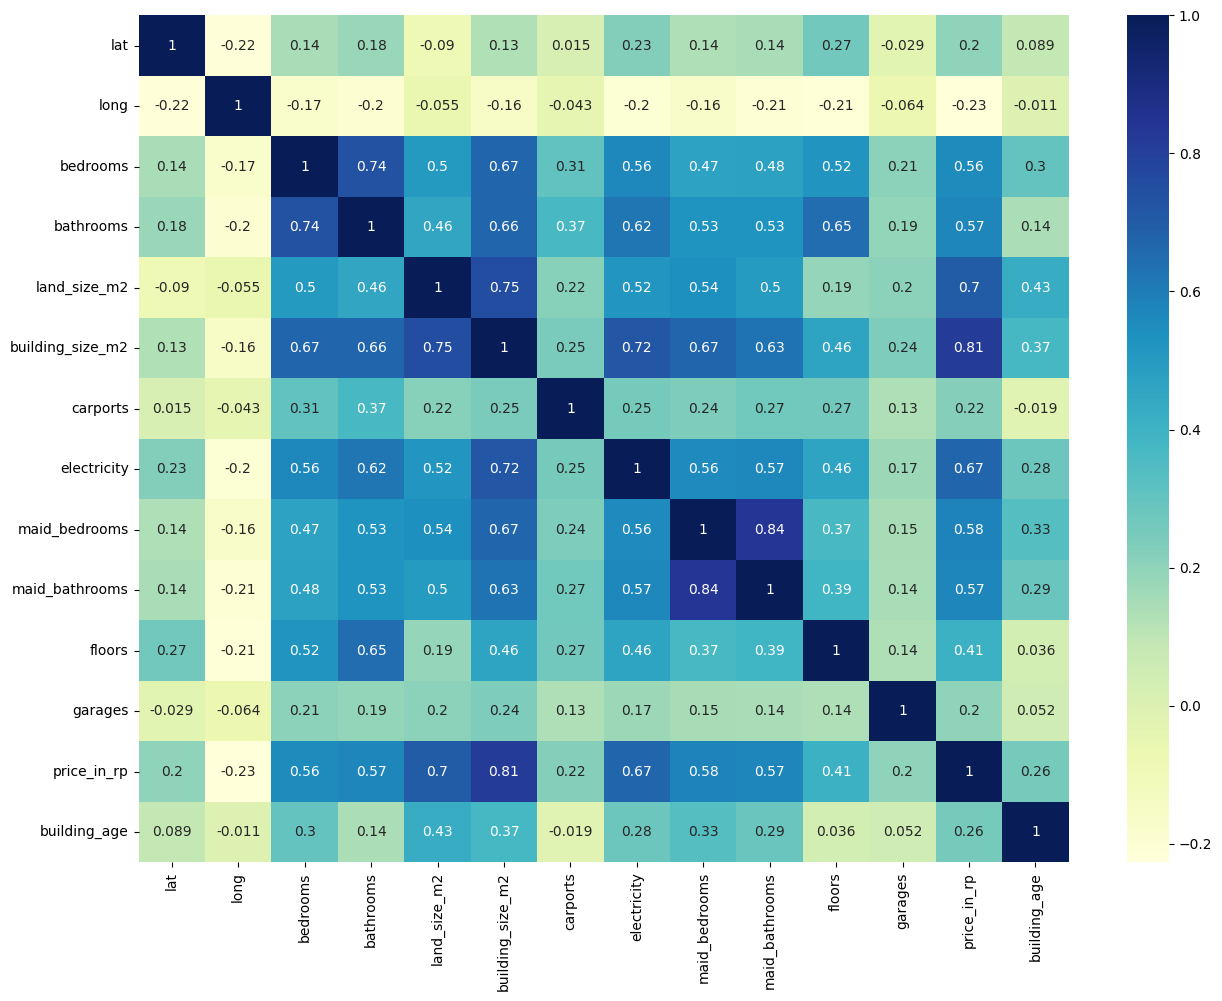

In [39]:
plt.figure(figsize=(15,11))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [40]:
train_data['land_size_m2'] = np.log(train_data['land_size_m2'])
train_data['building_size_m2'] = np.log(train_data['building_size_m2'])
train_data['price_in_rp'] = np.log(train_data['price_in_rp'])
train_data['electricity'] = np.log(train_data['electricity'])

array([[<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'land_size_m2'}>,
        <Axes: title={'center': 'building_size_m2'}>,
        <Axes: title={'center': 'carports'}>,
        <Axes: title={'center': 'electricity'}>],
       [<Axes: title={'center': 'maid_bedrooms'}>,
        <Axes: title={'center': 'maid_bathrooms'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'garages'}>],
       [<Axes: title={'center': 'price_in_rp'}>,
        <Axes: title={'center': 'building_age'}>, <Axes: >, <Axes: >]],
      dtype=object)

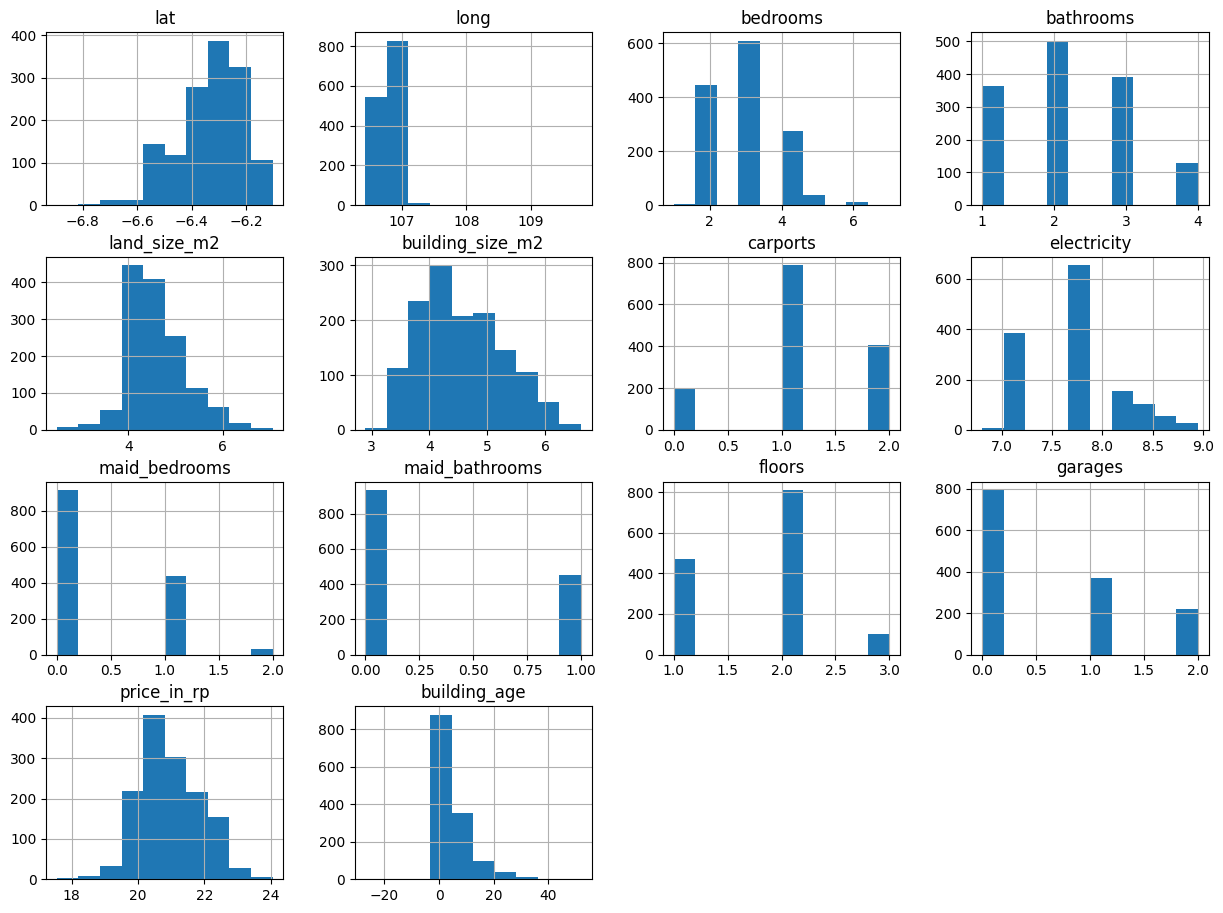

In [41]:
train_data.hist(figsize=(15,11))

In [42]:
train_data = train_data.join(pd.get_dummies(train_data.city,dtype=int)).drop(['city'],axis=1)
train_data = train_data.join(pd.get_dummies(train_data.certificate,dtype=int)).drop(['certificate'],axis=1)
train_data = train_data.join(pd.get_dummies(train_data.property_condition,dtype=int)).drop(['property_condition'],axis=1)
train_data = train_data.join(pd.get_dummies(train_data.building_orientation,dtype=int)).drop(['building_orientation'],axis=1)

<Axes: >

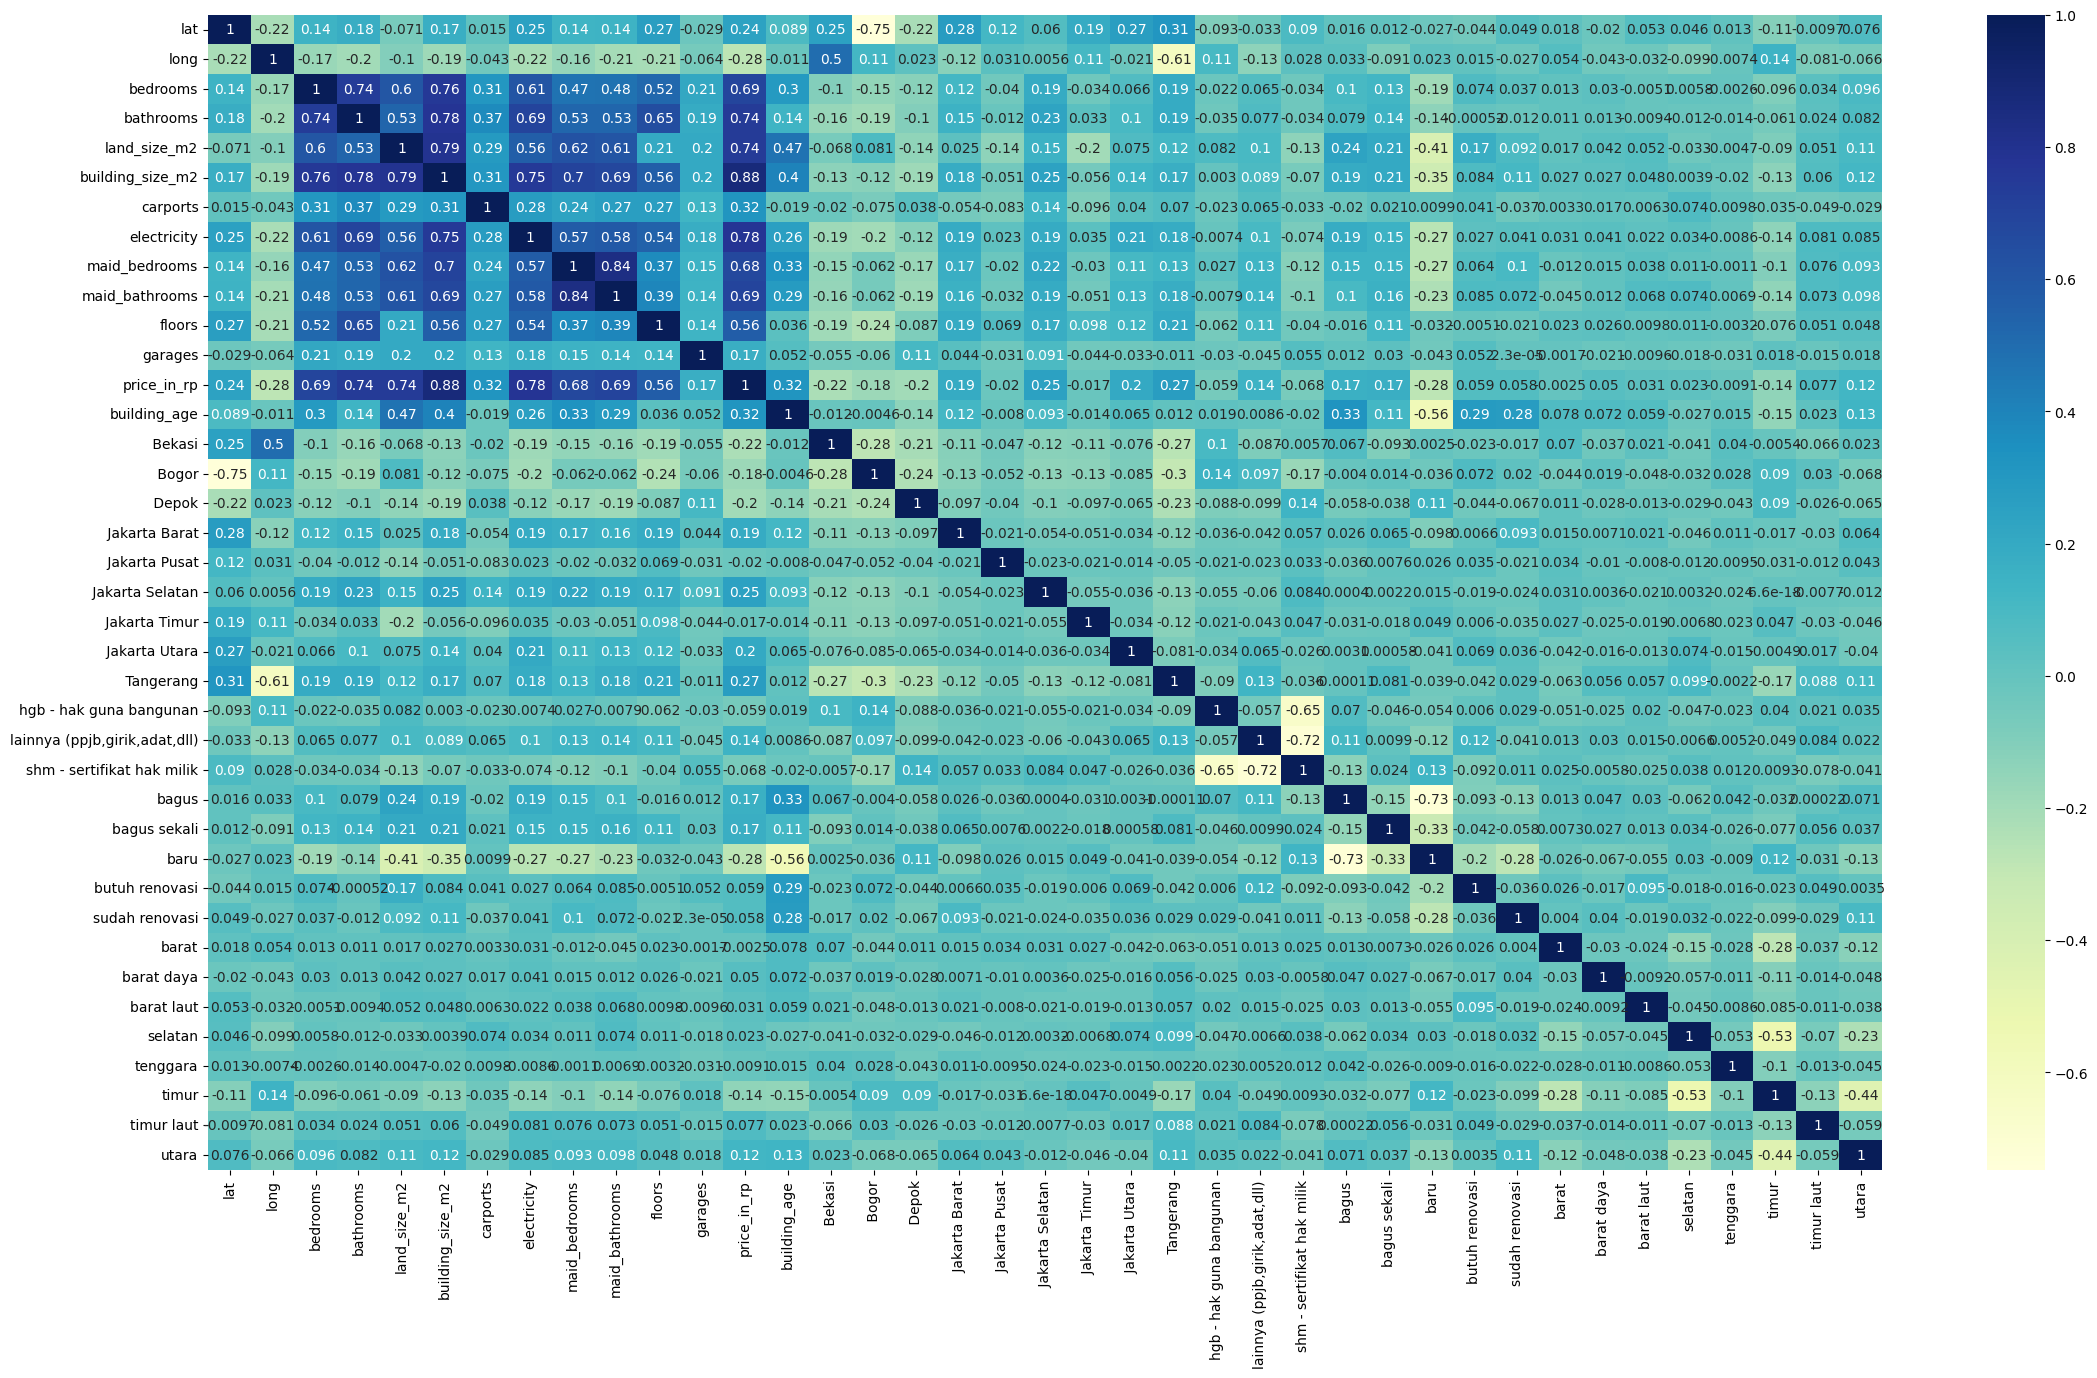

In [43]:
plt.figure(figsize=(27,15))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

<h2>Training and testing</h2>

In [44]:
X_train, y_train = train_data.drop(['price_in_rp'],axis=1),train_data['price_in_rp']

lre = LinearRegression()

lre.fit(X_train,y_train)

LinearRegression()

In [45]:
test_data = X_test.join(y_test)

test_data['building_age'] = 2025 - test_data['year_built']
test_data.drop(['year_built'],axis=1,inplace=True)

test_data['land_size_m2'] = np.log(test_data['land_size_m2'])
test_data['building_size_m2'] = np.log(test_data['building_size_m2'])
test_data['price_in_rp'] = np.log(test_data['price_in_rp'])
test_data['electricity'] = np.log(test_data['electricity'])

test_data = test_data.join(pd.get_dummies(test_data.city,dtype=int)).drop(['city'],axis=1)
test_data = test_data.join(pd.get_dummies(test_data.certificate,dtype=int)).drop(['certificate'],axis=1)
test_data = test_data.join(pd.get_dummies(test_data.property_condition,dtype=int)).drop(['property_condition'],axis=1)
test_data = test_data.join(pd.get_dummies(test_data.building_orientation,dtype=int)).drop(['building_orientation'],axis=1)

X_test, y_test = test_data.drop(['price_in_rp'],axis=1),test_data['price_in_rp']

In [46]:
lre.score(X_test,y_test)

0.8868778449944906

In [47]:
predictions = lre.predict(X_test)

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print("Akurasi (R^2) pada data test:", r2)
print("MAE:", mae)
print("MSE:",mse)
print("RMSE:", rmse)

Akurasi (R^2) pada data test: 0.8868778449944906
MAE: 0.23319820016876472
MSE: 0.09395109576877876
RMSE: 0.30651442995196615


In [49]:
from sklearn.ensemble import RandomForestRegressor 

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [50]:
forest.score(X_test,y_test)

0.9114906897485935

Text(0.5, 1.0, 'Distribution of Residuals')

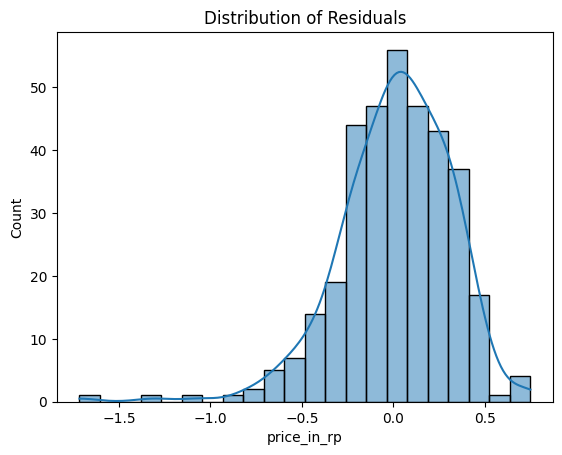

In [51]:
residuals = y_test - predictions
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")

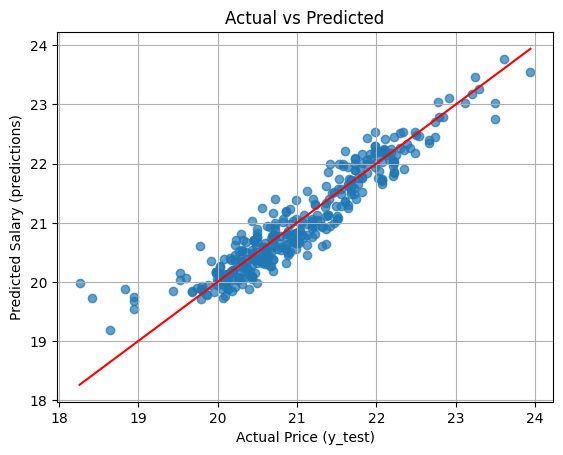

In [52]:
# Lets see how close the predicted results with the actual values.
plt.scatter(y_test, predictions, alpha=0.7)
plt.xlabel("Actual Price (y_test)")
plt.ylabel("Predicted Salary (predictions)")
plt.title("Actual vs Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # garis ideal
plt.grid(True)
plt.show()